
## Visualizing Stock Data With Candlestick Charts in Python

In [1]:
# !pip install --upgrade mplfinance


In [2]:
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

import warnings
warnings.filterwarnings("ignore")

C:\Users\hp\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:
# Define time frame 
start = dt.datetime(2019, 1, 1) # start date is 1st Jan 2019
end = dt.datetime(2019, 12, 31) # end date is 31st Dec 2019

print(start,end)

2019-01-01 00:00:00 2019-12-31 00:00:00


# New Terms
- Ticker symbol 
    -  unique identifier for a company stock. Eg. AAPL for Apple Inc, MSFT for Microsoft, GOOGL for Google, AMZN for Amazon. TSLA for Tesla, etc.

In [4]:
ticker = 'AMZN' # ticker symbol
df = pdr.DataReader(ticker, 'yahoo', start, end) # (Ticker symbol, data source, start date, end date)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,1520.760010,1487.000000,1510.800049,1501.969971,6954500,1501.969971
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010


In [6]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
cols = ['Open', 'High', 'Low', 'Close']
df=df[cols]


In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,Date,Open,High,Low,Close
0,2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971
1,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005
2,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029
3,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015
4,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010


In [10]:
df.Date = df.Date.apply(mdates.date2num) # convert date to number format

In [11]:
df.head()

,Date,Open,High,Low,Close
0,17896.0,1510.800049,1520.760010,1487.000000,1501.969971
1,17898.0,1465.199951,1553.359985,1460.930054,1539.130005
2,17899.0,1520.010010,1538.000000,1497.109985,1500.280029
3,17900.0,1530.000000,1594.000000,1518.310059,1575.390015
4,17903.0,1602.310059,1634.560059,1589.189941,1629.510010


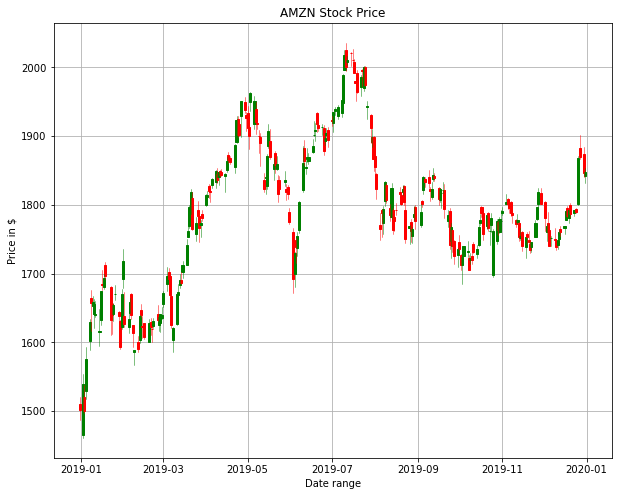

In [12]:
# Plotting the OHLC chart

plt.figure(figsize=(10,8))
ax = plt.subplot() # create a subplot
ax.xaxis_date() # set x-axis to date format

candlestick_ohlc(ax, df.values, width=1.5, colorup='g', colordown='r') # plot the OHLC chart
plt.title(f'{ticker} Stock Price') # set the title
ax.grid(True) # add grid
ax.set_axisbelow(True) # set grid below the chart
ax.set_facecolor('white') # set the background color
plt.ylabel('Price in $') # set the y-axis label
plt.xlabel('Date range') # set the x-axis label
ax.tick_params(axis='x', colors='black') # set the color of the ticks
plt.show(); # show the plot

In [13]:

def create_candlestick(ticker_symbol,start,end):
    '''
        Create a candlestick chart for a given ticker symbol 
        ticker_symbol: string
        start: datetime
        end: datetime
    '''
    import datetime as dt   # for date objects 
    import pandas_datareader as pdr # for data fetching
    import matplotlib.pyplot as plt # for plotting
    import pandas as pd # for data manipulation
    import matplotlib.dates as mdates # for formatting date objects
    
    from mpl_finance import candlestick_ohlc # for candlestick chart
    
    df = pdr.DataReader(ticker_symbol, 'yahoo', start, end) # fetch data
    cols = ['Open', 'High', 'Low', 'Close']
    df=df[cols]
    df.reset_index(inplace=True)
    df.Date = df.Date.apply(mdates.date2num) # convert date to number format
        
    plt.figure(figsize=(10,8))
    ax = plt.subplot() # create a subplot
    ax.xaxis_date() # set x-axis to date format

    candlestick_ohlc(ax, df.values, width=1.5, colorup='g', colordown='r') # plot the OHLC chart
    plt.title(f'{ticker} Stock Price') # set the title
    ax.grid(True) # add grid
    ax.set_axisbelow(True) # set grid below the chart
    ax.set_facecolor('white') # set the background color
    plt.ylabel('Price in $') # set the y-axis label
    plt.xlabel('Date range') # set the x-axis label
    ax.tick_params(axis='x', colors='black') # set the color of the ticks
    plt.show(); # show the plot
    

' Create a candlestick chart for a given ticker symbol '

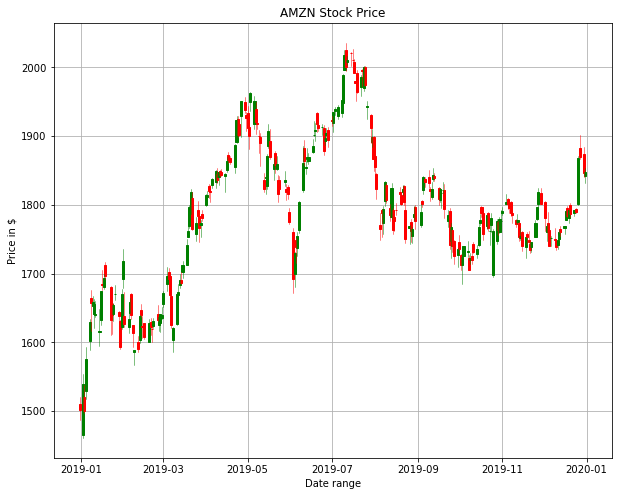

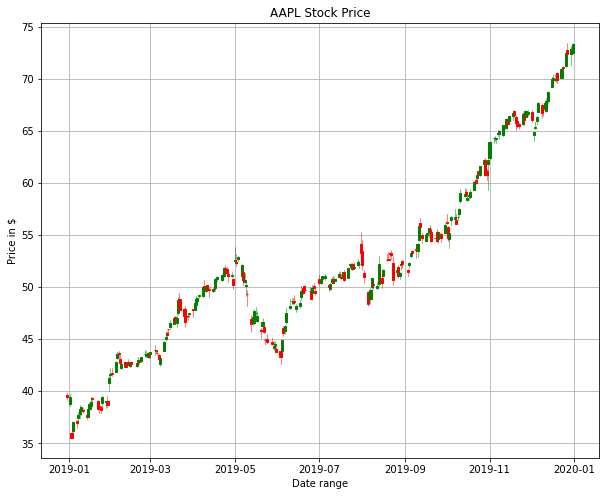

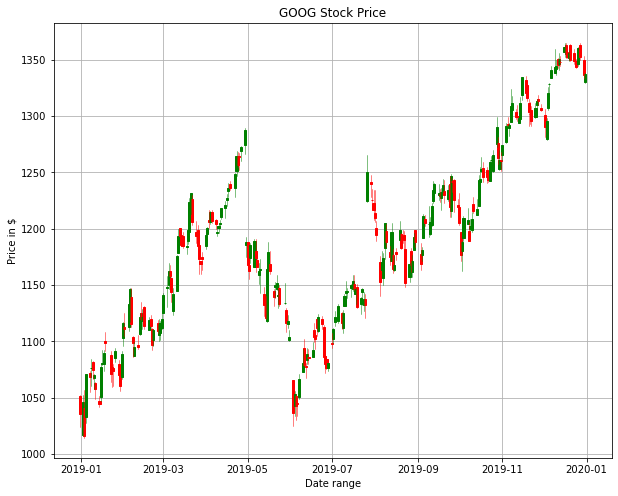

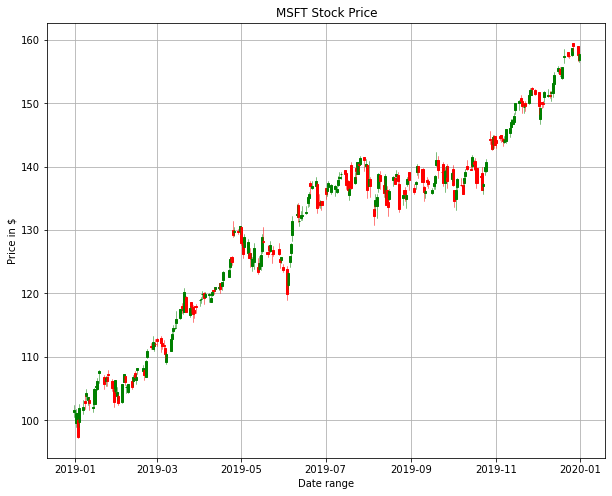

In [14]:
tickers = ['AMZN', 'AAPL', 'GOOG', 'MSFT']

for ticker in tickers:
    create_candlestick(ticker,start,end)